In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# measurement columns & types
meas_cols = inspect(engine).get_columns('measurement')
for col in meas_cols:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [18]:
# station columns & types
stat_cols = inspect(engine).get_columns('station')
for col in stat_cols:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [22]:
#find the date a year from the most recent.
last_year = str(dt.date(2017, 8, 23)- dt.timedelta(days=366))
last_year

'2016-08-22'

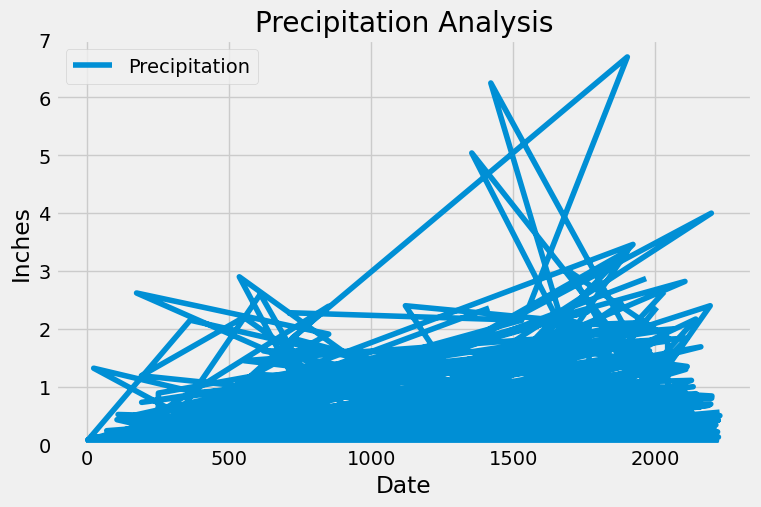

<Figure size 640x480 with 0 Axes>

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = str(dt.date(2017, 8, 23)- dt.timedelta(days=366))

# Perform a query to retrieve the date and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).filter(measurement.date > last_year, measurement.date).all()
dates=[]
precipitation=[]
for row in prcp_data:
    #precip_df = pd.DataFrame(list(zip(row.date, row.prcp)),columns = ['Date', 'Inches'])
    dates.append(row.date)
    precipitation.append(row.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(list(zip(dates, precipitation)),columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df_sorted = precip_df.sort_values(by='Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
#precip_df.plot(kind='bar',xlabel='Date', ylabel='Inches',ylim=(0,7), figsize= (8,5), title='Precip Analysis', rot=45)

graph = precip_df_sorted.plot(ylim=(0,7), figsize= (8,5), title='Precipitation Analysis')
graph.set_xlabel('Date')
graph.set_ylabel('Inches')
plt.show()
plt.tight_layout()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_q = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_q

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
t_obs = session.query(measurement.tobs).filter(measurement.station == station_q[0][0])
lowest = t_obs.order_by(measurement.tobs).first()
highest = t_obs.order_by(measurement.tobs.desc()).first()
sum = session.query(func.sum(measurement.tobs)).filter(measurement.station == station_q[0][0]).all()
average = sum[0][0]/station_q[0][1]
print(lowest, highest, average)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs, measurement.prcp).filter(measurement.date > last_year, measurement.date).all()


# Close Session

In [ ]:
# Close Session
session.close()